In [74]:
import requests
import json
import sys
import numpy as np
import pandas as pd
import csv
from  keys  import  client_id, api_key
import seaborn as sns
import matplotlib.pyplot as plt

# !{sys.executable} -m pip install latex
# !{sys.executable} -m pip install latex
# !{sys.executable} -m pip install PyDvi
# !{sys.executable} -m pip install ghostscript

plt.rcParams.update({"text.usetex": False, "font.family": "serif", "font.serif": ["Palatino"]})

%matplotlib inline

In [ ]:
    New:
'pgf.texsystem': 'xelatex',
'text.latex.preamble': '',
'text.latex.preview': False,
'text.usetex': True,
    
    Old:
plt.rcParams['text.usetex']=True
plt.rcParams['text.latex.unicode']=True


In [68]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [72]:
df_prod_ny = pd.read_csv('database/Production House_New York_database.csv')
df_prod_la = pd.read_csv('database/Production House_Los Angeles_database.csv')
df_prod_ga = pd.read_csv('database/Production House_Atlanta_database.csv')

In [10]:
df_fer_ny =  pd.read_csv('database/Film Equipment Rental_New York_database.csv')
df_fer_la =  pd.read_csv('database/Film Equipment Rental_Los Angeles_database.csv')

In [21]:
df_prod_ny_reviews = pd.read_csv('database/Production House_New York_reviews.csv')
df_prod_la_reviews = pd.read_csv('database/Production House_Los Angeles_reviews.csv')
df_prod_ga_reviews = pd.read_csv('database/Production House_Atlanta_reviews.csv')

df_fer_ny_reviews = pd.read_csv('database/Film Equipment Rental_New York_reviews.csv')
df_fer_la_reviews = pd.read_csv('database/Film Equipment Rental_Los Angeles_reviews.csv')

In [23]:
# df_prod_ny
# df_prod_ny_reviews

# df_prod_la
# df_prod_la_reviews

# df_prod_ga
# df_prod_ga_reviews """# these are still 2/3 reviews per business. 
#                         easy fix, just run our reviews function again with parameters:
#                                                  Production House, Atlanta, Video/Film
# """

# df_fer_ny
# df_fer_ny_reviews

# df_fer_la
# df_fer_la_reviews

,Review_0,Review_1,Review_2,Id
0,"I am a commercial/MV line producer in LA, and ...",I'm a film student and I was very nervous abou...,"Quick, friendly, helpful. Flagged me into thei...",9ThlqCyvOAPrgedis6Bw0A
1,Ryan and the team at Lightstone always make th...,My company and I have only had positive experi...,Highly Highly recommend this place! Lightstone...,9hDT3fdWJoRFkGa62Z0Z6Q
2,Jake at Pro HD Rentals did an amazing job at e...,I was recommended to this place by a very resp...,I would highly recommend Pro HD Rentals for al...,-vpcJktTviMd-K9xX-ZPww
3,"Customer here for years, my go-to shop for any...",Amazing service from Yani this morning. He wa...,The bespectacled 'Barney' behind the counter a...,J8GxUvGNN1VKj2C7Rfmwcw
4,"Quick, easy rental. Stray Angel is willing to ...",I emailed from their website. After 2 days of ...,Always use Stray Angel for my production renta...,QfFgXQiaEg2P7PtcuMie8g
...,...,...,...,...
115,"I never paid to be a member here, I been on mo...",This is the second time this has happened to m...,I liked the Yelp reviews for Hollywood Casting...,TqlE1El6dBM8ST58obk4vw
116,My husband and I found Shmily after months of ...,There is a reason that Shmily Wedding Photogra...,"Frank is awesome! The most enthusiastic, suppo...",Czn5fNHVmjFgVTh0p3jY8w
117,After careful consideration for a birthday par...,We rented a small projector and screen for an ...,My daughter and her friends were asked to sing...,tnZf7M7upDqrCqCbxkYM7w
118,Experience: We wanted to do Christmas family ...,My partner and I recently used Something New a...,Anne and David were our photographer/videograp...,t60QOLLg2Ad-SLwgJiNkXQ


In [5]:
df_prod_ny.describe()
# '''
# More money in NYC than LA, not by much
# Could be impacted by amount of places that have price listed
# Competition and Property value are things to keep in mind 
# Slightly larger range in NYC than LA, but mostly modest-high cost range (std)

# '''

,Rating,Review Count,Price
count,1000.000000,1000.000000,615.000000
mean,4.181500,451.836000,2.403252
std,0.508494,738.749932,0.675289
min,2.000000,1.000000,1.000000
25%,4.000000,30.750000,2.000000
50%,4.000000,194.000000,2.000000
75%,4.500000,547.500000,3.000000
max,5.000000,10016.000000,4.000000


In [6]:
df_prod_la.describe()
# '''
# LA Reviews the most out of the 3 cities
# Mean rating is much higher than the other cities
# LA has highest std, could have outliers bringing the review count mean up 
# Find neighboorhoods that dont have high ratings to get around customer loyalty


# '''

,Rating,Review Count,Price
count,1000.000000,1000.000000,358.00000
mean,4.486500,480.234000,2.24581
std,0.552153,928.618166,0.60430
min,1.500000,1.000000,1.00000
25%,4.000000,9.000000,2.00000
50%,4.500000,57.000000,2.00000
75%,5.000000,587.500000,3.00000
max,5.000000,8638.000000,4.00000


In [7]:
df_prod_ga.describe()
# Cheper, making less money as Business owners compared to NY and LA
# Less reviews per store in GA than LA or NY, would get less customers


,Rating,Review Count,Price
count,1000.000000,1000.000000,774.000000
mean,3.804000,284.178000,2.018088
std,0.654609,388.846409,0.508335
min,1.000000,1.000000,1.000000
25%,3.500000,55.000000,2.000000
50%,4.000000,173.500000,2.000000
75%,4.000000,363.250000,2.000000
max,5.000000,3949.000000,4.000000


In [6]:
df_prod_ga.describe().loc['mean']



Rating            3.805500
Review Count    283.810000
Price             2.018135
Name: mean, dtype: float64

### Total Businesses per each Price Category
Atlanta has far more popular lower-cost service houses than New York and Los Angeles. This would make competing in such an environment as a start-up far more difficult, until we scale to the point to where we can secure talent and the ability to provide high-level services that are worthy of 4-dollar-sign prices. <br>

On the other hand, it would be worth getting the `len(parsed['total'])` of the call results per location. <br>
If the total number of production houses in Atlanta are much lower than the total in NYC and LA, then the market might be too saturated in the larger cities, making it difficult for new competition. 

Beyond the scope of this project, there are some other considerations that could be taken, such as: 
- commercial real estate prices per location (possibly through other API such as Zilliow)
- other costs of doing business per location

🥳


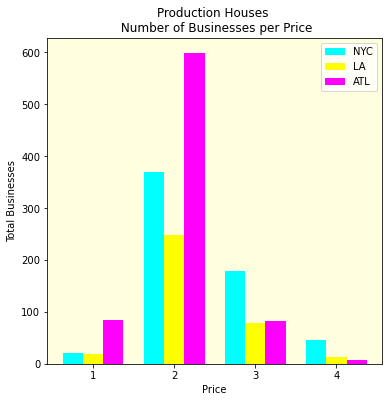

In [34]:
price_review_cnt_title = 'Production Houses \n Number of Businesses per Price'
x_label = 'Price'
y_label = 'Total Businesses'
width = .25


x1 = df_prod_ny['Price'].value_counts().sort_index().index[:4]
y1 = df_prod_ny['Price'].value_counts().sort_index()

x2 = df_prod_la['Price'].value_counts().sort_index().index[:4]
y2 = df_prod_la['Price'].value_counts().sort_index()

x3 = df_prod_ga['Price'].value_counts().sort_index().index[:4]
y3 = df_prod_ga['Price'].value_counts().sort_index()

# xtik = [1, 2, 3, 4]

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlabel(x_label)
ax.set_ylabel(y_label);
ax.set_xticks([1, 2, 3, 4])
# ax.set_xticks(['$'*i for i in xtik])

ax.bar(x1-(width), y1, width, color="cyan", align='center')
ax.bar(x2, y2, width, color="yellow", align= 'center')
ax.bar(x3+(width), y3, width, color="magenta", align= 'center')
ax.set_title(price_review_cnt_title)
ax.set_facecolor("lightyellow")

ax.legend(['NYC', 'LA', 'ATL'])
print('🥳')

### Insights:
- Atlanta has way more reviews for cheaper production houses
  - this means that there would be more competition in Atlanta if we are trying to undercut the competition
- Likewise, **all** locations have the most reviews in the *second lowest price range*
  - this indicates that in all locations, we would attract the most customers by targeting that price range

In [ ]:
sns.scatterplot(df_prod_ny['Price'], df_prod_la['Price', )

🥳


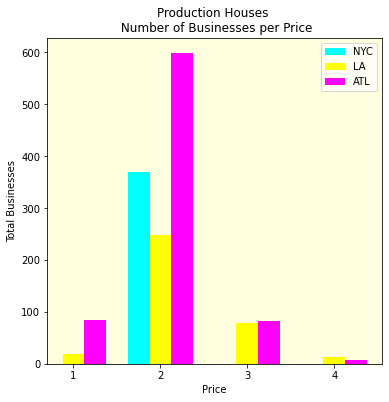

In [35]:
price_review_cnt_title = 'Production Houses \n Number of Businesses per Price'
x_label = 'Price'
y_label = 'Total Businesses'
width = .25


x1 = df_prod_ny['Price'].median()
y1 = df_prod_ny['Price'].value_counts().sort_index()

x2 = df_prod_la['Price'].value_counts().sort_index().index[:4]
y2 = df_prod_la['Price'].value_counts().sort_index()

x3 = df_prod_ga['Price'].value_counts().sort_index().index[:4]
y3 = df_prod_ga['Price'].value_counts().sort_index()

# xtik = [1, 2, 3, 4]

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlabel(x_label)
ax.set_ylabel(y_label);
ax.set_xticks([1, 2, 3, 4])
# ax.set_xticks(['$'*i for i in xtik])

ax.bar(x1-(width), y1, width, color="cyan", align='center')
ax.bar(x2, y2, width, color="yellow", align= 'center')
ax.bar(x3+(width), y3, width, color="magenta", align= 'center')
ax.set_title(price_review_cnt_title)
ax.set_facecolor("lightyellow")

ax.legend(['NYC', 'LA', 'ATL'])
print('🥳')

#### Insights:

### Rating / Review Count

In [26]:
df_prod_ga['Rating']

0      5.0
1      5.0
2      5.0
3      4.5
4      5.0
      ... 
995    3.5
996    2.5
997    2.5
998    3.0
999    4.0
Name: Rating, Length: 1000, dtype: float64

In [27]:
x1 = df_prod_nyc['Rating'].value_counts().sort_index().index[:5]
x1

Float64Index([2.0, 2.5, 3.0, 3.5, 4.0], dtype='float64')

In [28]:
x2 = df_prod_la['Rating'].value_counts().sort_index().index[:5]
x2

Float64Index([1.5, 2.5, 3.0, 3.5, 4.0], dtype='float64')

In [29]:
x3 = df_prod_ga['Rating'].value_counts().sort_index().index[:5]
x3

Float64Index([1.0, 1.5, 2.0, 2.5, 3.0], dtype='float64')

In [30]:
df_prod_nyc['Rating'].value_counts().sort_index().index

Float64Index([2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], dtype='float64')

In [ ]:
color = 'steelblue', color = 'indianred', color = 'palegreen'


🥳


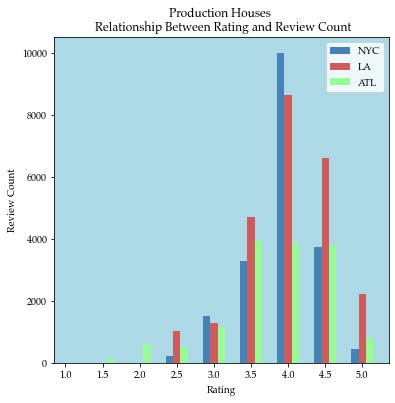

In [140]:
rating_review_cnt_title = 'Production Houses \n Relationship Between Rating and Review Count'
x_label = 'Rating'
y_label = 'Review Count'
width = .1

x1 = df_prod_ny['Rating']
y1 = df_prod_ny['Review Count']

x2 = df_prod_la['Rating']
y2 = df_prod_la['Review Count']

x3 = df_prod_ga['Rating']
y3 = df_prod_ga['Review Count']

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlabel(x_label)
ax.set_ylabel(y_label);
ax.set_xticks([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

ax.bar(x1-(width), y1, width, color="steelblue", align='center')
ax.bar(x2, y2, width, color='indianred', align= 'center')
ax.bar(x3+(width), y3, width, color='palegreen', align= 'center')
ax.set_title(rating_review_cnt_title)
ax.set_facecolor("lightblue")

ax.legend(['NYC', 'LA', 'ATL'])
print('🥳')

#### Insights: 

### Rating / Price

In [45]:
df_prod_ny.loc[(df_prod_ny['Rating'] >= 4)]

,Name,Address,City,Rating,Review Count,Coordinates,Price,Id,Categories
0,Urban Myth Studio,"['505 Johnson Ave', 'Brooklyn, NY 11237']",Brooklyn,5.0,4,"{'latitude': 40.708663918903, 'longitude': -73...",NaN,FOVaV6u49Hb3VEncHJ5eVg,"[{'alias': 'videofilmproductions', 'title': 'V..."
1,Hit and Run Productions,"['65 Roebling St', 'Ste 202', 'Brooklyn, NY 11...",Brooklyn,5.0,4,"{'latitude': 40.7165128, 'longitude': -73.9546...",NaN,ntnuLH-tk9Qh8n895hDV9g,"[{'alias': 'videofilmproductions', 'title': 'V..."
2,Be Electric Studios,"['1298 Willoughby Ave', 'Brooklyn, NY 11237']",Brooklyn,4.5,4,"{'latitude': 40.7052438, 'longitude': -73.9218...",NaN,lmiG3-1CZFcoQBESPa7KMw,"[{'alias': 'videofilmproductions', 'title': 'V..."
3,Starr Street Studios,"['207-A Starr St', 'Ste 3-1', 'Brooklyn, NY 11...",Brooklyn,5.0,8,"{'latitude': 40.705122, 'longitude': -73.923457}",NaN,rXjhzma0XIrxJEFt7q0tIg,"[{'alias': 'videofilmproductions', 'title': 'V..."
4,Morris-Jumel Mansion,"['65 Jumel Ter', 'New York, NY 10032']",New York,4.5,38,"{'latitude': 40.83449, 'longitude': -73.93851}",NaN,Sn9jYOKrk0CgeZVGzKAJPw,"[{'alias': 'museums', 'title': 'Museums'}, {'a..."
...,...,...,...,...,...,...,...,...,...
994,Laura Pels Theatre,"['111 W 46th St', 'New York, NY 10036']",New York,4.0,15,"{'latitude': 40.7576962, 'longitude': -73.9826...",NaN,rLKX5SnocYxGTsJ3v9E_EA,"[{'alias': 'theater', 'title': 'Performing Art..."
996,The Play That Goes Wrong,"['340 W 50th St', 'New York, NY 10019']",New York,4.0,71,"{'latitude': 40.7628267, 'longitude': -73.987646}",NaN,C8Ua3n56zNBJRkk0O4lYlQ,"[{'alias': 'theater', 'title': 'Performing Art..."
997,Say Something Bunny,"['511 W 20th St', 'New York, NY 10011']",New York,4.0,4,"{'latitude': 40.74618, 'longitude': -74.00614}",NaN,N1wUr9ASCdWGy4yIoiNMqg,"[{'alias': 'theater', 'title': 'Performing Art..."
998,Sergimmo Salumeria,"['456 9th Ave', 'New York, NY 10018']",New York,4.0,683,"{'latitude': 40.754296, 'longitude': -73.995498}",2.0,9iC39Z1YjZKbrrCANgzBXg,"[{'alias': 'italian', 'title': 'Italian'}, {'a..."


In [51]:
ny_prod_high_rating_price2['Review Count'].values

array([  165,   124,  5652,   424,  1124,    33,     7,    18,  1691,
         661,   946,   376,    65,   607,     6,  1796,   882,  1744,
         240,   412,   219,   813,   538,   270,   823,   822,   413,
        2323,    38,   826,   234,   826,    13,   751,    18,   212,
         272,   364,   876,   205,   386,  2692,  1499,   102, 10016,
         333,   685,  2066,   233,  1174,  1106,   254,  1026,   626,
         784,   506,  1027,     7,  1617,  1215,  1108,   612,  1253,
        1042,   356,   179,    77,   410,  5129,    57,   433,  4313,
         895,  1893,   179,   453,  1262,  3149,   289,   254,    72,
          12,    86,  2384,    31,   436,  1048,     2,    35,   974,
         126,   283,     4,   147,  2031,  3273,   531,   662,   604,
        1038,   544,   214,  1936,   507,    56,   511,    62,   126,
        2089,    85,   170,   230,   633,   112,   283,   533,   977,
         973,   118,   194,   343,   330,  1169,   643,  1100,   130,
         931,   222,

In [52]:
ny_prod_high_rating_price2.index

Int64Index([ 21,  27,  31,  44,  59,  60,  64,  81,  82,  83,
            ...
            971, 973, 977, 983, 984, 986, 987, 988, 990, 998],
           dtype='int64', length=302)

In [53]:
ny_prod_high_rating_price2

,Name,Address,City,Rating,Review Count,Coordinates,Price,Id,Categories
21,DiJiFi,"['1166 Manhattan Ave', 'Ste 201', 'Brooklyn, N...",Brooklyn,4.5,165,"{'latitude': 40.7382584, 'longitude': -73.9549...",2.0,CwBYC8nVLbG7KjVU6nwR4A,"[{'alias': 'photographystores', 'title': 'Phot..."
27,Kings County Distillery,"['299 Sands St', 'Bldg 121', 'Brooklyn, NY 112...",Brooklyn,4.5,124,"{'latitude': 40.6997470891061, 'longitude': -7...",2.0,J3ZLnLE-DZzrJu2ryEmrEw,"[{'alias': 'distilleries', 'title': 'Distiller..."
31,Eataly Flatiron,"['200 5th Ave', 'New York, NY 10010']",New York,4.0,5652,"{'latitude': 40.74195877796, 'longitude': -73....",2.0,a0IET3_yCFcO36OqGSsisg,"[{'alias': 'italian', 'title': 'Italian'}, {'a..."
44,The Malt House,"['206 Thompson St', 'New York, NY 10012']",New York,4.0,424,"{'latitude': 40.728647, 'longitude': -73.999383}",2.0,NT2mKx3_kxO9tpjeP2Sv6Q,"[{'alias': 'gastropubs', 'title': 'Gastropubs'..."
59,Forest Hills Station House,"['106-11 71st Ave', 'Forest Hills, NY 11375']",Forest Hills,4.0,1124,"{'latitude': 40.7199422, 'longitude': -73.8451...",2.0,NVp1S29NLR573Lc4ZvICKw,"[{'alias': 'gastropubs', 'title': 'Gastropubs'..."
...,...,...,...,...,...,...,...,...,...
986,Parc Oasis Oyster Bar,"['6403 11th Ave', 'Brooklyn, NY 11219']",Brooklyn,4.0,150,"{'latitude': 40.6290427824765, 'longitude': -7...",2.0,v4cXt2qe9pq_XWJflL5ISg,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a..."
987,Boulton & Watt,"['5 Ave A', 'New York, NY 10009']",New York,4.0,678,"{'latitude': 40.722520164329694, 'longitude': ...",2.0,Cz6It2NB_QBXCjnlsWGZSA,"[{'alias': 'newamerican', 'title': 'American (..."
988,HinoMaru Ramen,"['33-18 Ditmars Blvd', 'Astoria, NY 11105']",Astoria,4.0,893,"{'latitude': 40.774889916651, 'longitude': -73...",2.0,D65eObUbArHu6UiQsUasgw,"[{'alias': 'ramen', 'title': 'Ramen'}, {'alias..."
990,Jajaja Plantas Mexicana,"['63 Carmine St', 'New York, NY 10014']",New York,4.5,254,"{'latitude': 40.72979, 'longitude': -74.00455}",2.0,PHMkwS5nmo4IUXbcg0OcAg,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a..."


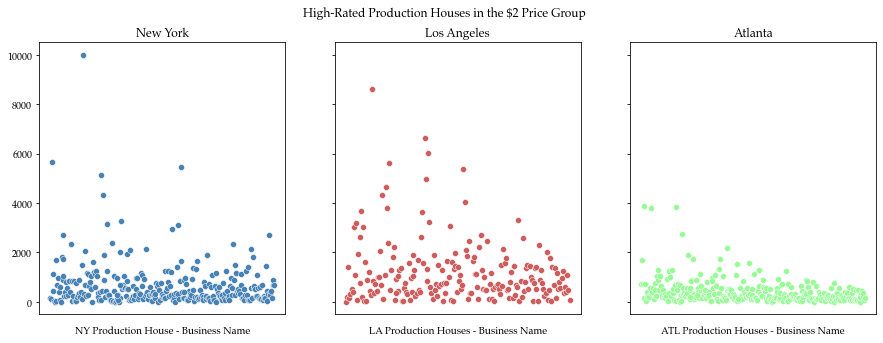

In [138]:
ny_prod_high_rating_price2 = df_prod_ny.loc[(df_prod_ny['Rating'] >= 4) & (df_prod_ny['Price'] == 2)]
la_prod_high_rating_price2 = df_prod_la.loc[(df_prod_la['Rating'] >= 4) & (df_prod_la['Price'] == 2)]
ga_prod_high_rating_price2 = df_prod_ga.loc[(df_prod_ga['Rating'] >= 4) & (df_prod_ga['Price'] == 2)]


fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('High-Rated Production Houses in the $2 Price Group')

# NY
g1 = sns.scatterplot(ax=ax[0], x= ny_prod_high_rating_price2['Name'], y= ny_prod_high_rating_price2['Review Count'].values, color = 'steelblue')
ax[0].set_title('New York')

# LA
g2 = sns.scatterplot(ax=ax[1], x= la_prod_high_rating_price2['Name'], y= la_prod_high_rating_price2['Review Count'].values, color = 'indianred')
ax[1].set_title('Los Angeles')

# ATL
g3 = sns.scatterplot(ax=ax[2], x= ga_prod_high_rating_price2['Name'], y= ga_prod_high_rating_price2['Review Count'].values, color = 'palegreen')
ax[2].set_title('Atlanta')

g1.set(xticklabels=[])
g2.set(xticklabels=[])
g3.set(xticklabels=[])
g1.set_xlabel('NY Production House - Business Name')
g2.set_xlabel('LA Production Houses - Business Name')
g3.set_xlabel('ATL Production Houses - Business Name')
g1.tick_params(bottom=False) 
g2.tick_params(bottom=False) 
g3.tick_params(bottom=False);

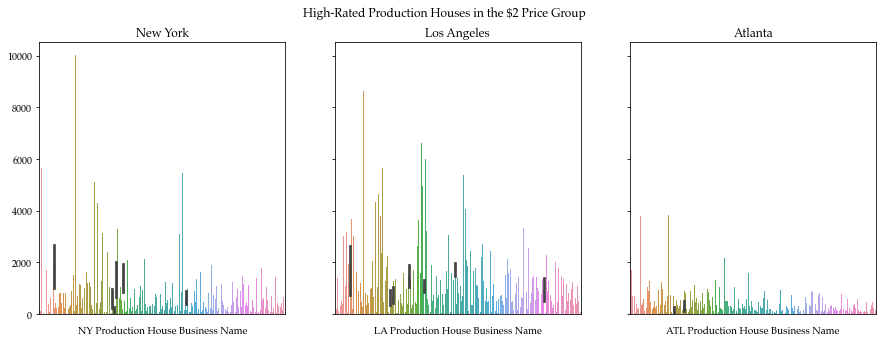

In [137]:
ny_prod_high_rating_price2 = df_prod_ny.loc[(df_prod_ny['Rating'] >= 4) & (df_prod_ny['Price'] == 2)]
la_prod_high_rating_price2 = df_prod_la.loc[(df_prod_la['Rating'] >= 4) & (df_prod_la['Price'] == 2)]
ga_prod_high_rating_price2 = df_prod_ga.loc[(df_prod_ga['Rating'] >= 4) & (df_prod_ga['Price'] == 2)]


fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('High-Rated Production Houses in the $2 Price Group')

# NY
g1 = sns.barplot(ax=ax[0], x= ny_prod_high_rating_price2['Name'], y= ny_prod_high_rating_price2['Review Count'].values)
ax[0].set_title('New York')

# LA
g2 = sns.barplot(ax=ax[1], x= la_prod_high_rating_price2['Name'], y= la_prod_high_rating_price2['Review Count'].values)
ax[1].set_title('Los Angeles')

# ATL
g3 = sns.barplot(ax=ax[2], x= ga_prod_high_rating_price2['Name'], y= ga_prod_high_rating_price2['Review Count'].values)
ax[2].set_title('Atlanta')

g1.set(xticklabels=[])
g2.set(xticklabels=[])
g3.set(xticklabels=[])
g1.set_xlabel('NY Production House Business Name')
g2.set_xlabel('LA Production House Business Name')
g3.set_xlabel('ATL Production House Business Name')
g1.tick_params(bottom=False) 
g2.tick_params(bottom=False) 
g3.tick_params(bottom=False);

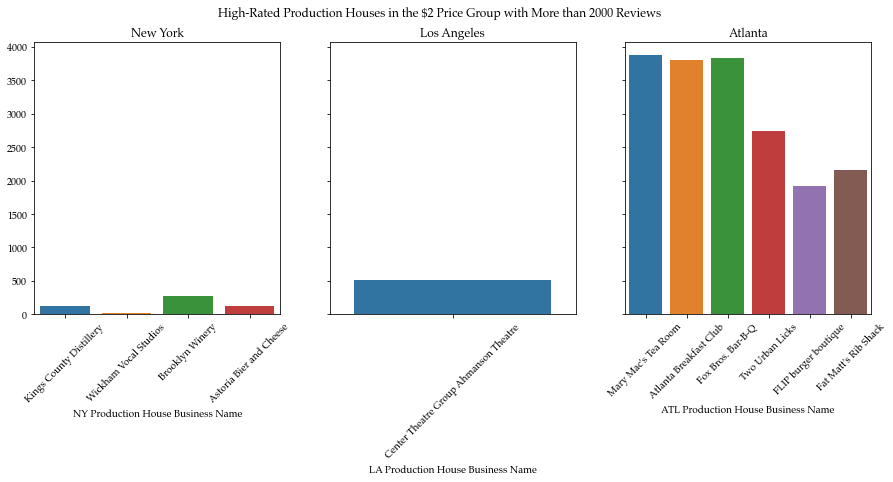

In [127]:
ny_prod_high_rating_price2 = df_prod_ny.loc[(df_prod_ny['Rating'] >= 4) & (df_prod_ny['Price'] == 2) & (df_prod_ga['Review Count'] >= 1800)]
la_prod_high_rating_price2 = df_prod_la.loc[(df_prod_la['Rating'] >= 4) & (df_prod_la['Price'] == 2) & (df_prod_ga['Review Count'] >= 1800)]
ga_prod_high_rating_price2 = df_prod_ga.loc[(df_prod_ga['Rating'] >= 4) & (df_prod_ga['Price'] == 2) & (df_prod_ga['Review Count'] >= 1800)]


fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('High-Rated Production Houses in the $2 Price Group with More than 2000 Reviews', fontweight = 'bold')

# for i, j in zip(range(numvars), itertools.cycle((-1, 0))):
#     axes[j,i].xaxis.set_visible(True)
#     axes[i,j].yaxis.set_visible(True)

#     for tick in axes[i,j].get_xticklabels():
#         tick.set_rotation(45)
#     for tick in axes[j,i].get_xticklabels():
#         tick.set_rotation(45)

# NY
g1 = sns.barplot(ax=ax[0], x= ny_prod_high_rating_price2['Name'], y= ny_prod_high_rating_price2['Review Count'].values)
ax[0].set_title('New York')
# LA
g2 = sns.barplot(ax=ax[1], x= la_prod_high_rating_price2['Name'], y= la_prod_high_rating_price2['Review Count'].values)
ax[1].set_title('Los Angeles')
# ATL
g3 = sns.barplot(ax=ax[2], x= ga_prod_high_rating_price2['Name'], y= ga_prod_high_rating_price2['Review Count'].values)
ax[2].set_title('Atlanta')

for tick in g1.get_xticklabels():
    tick.set_rotation(45)

for tick in g2.get_xticklabels():
    tick.set_rotation(45)

for tick in g3.get_xticklabels():
    tick.set_rotation(45)

g1.set_xlabel('NY Production House Business Name')
g2.set_xlabel('LA Production House Business Name')
g3.set_xlabel('ATL Production House Business Name');

### Finding Errors with our Data
- As we can see above, New York and Atlanta include several restaurants and food artisans.
   - This is likely because 'production' can mean many things, and is not unique to film
   - Other likely cause: Search is inclusive of all results that include 'house' e.g: 'house of ribs', disregarding 'production' all together
   - Beyond that, the *most popular* places on Yelp would be restaurants due to the fact that:
       - Yelp as a web directory for local businesses is primarily associated with restaurants
       - Restaurants are an industry patronized by a majority of the population (pro-consumer)...
       - ... while film production houses are industry-specific
       


🥳


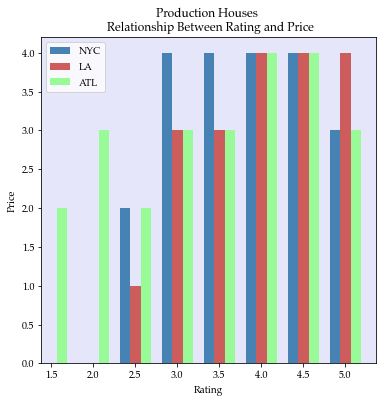

In [131]:
rating_price_title = 'Production Houses \n Relationship Between Rating and Price'
x_label = 'Rating'
y_label = 'Price'
width = .125

x1 = df_prod_nyc['Rating']
y1 = df_prod_nyc['Price']

x2 = df_prod_la['Rating']
y2 = df_prod_la['Price']

x3 = df_prod_ga['Rating']
y3 = df_prod_ga['Price']

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlabel(x_label)
ax.set_ylabel(y_label);
ax.set_xticks([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

ax.bar(x1-(width), y1, width, color="steelblue", align='center')
ax.bar(x2, y2, width, color="indianred", align= 'center')
ax.bar(x3+(width), y3, width, color="palegreen", align= 'center')
ax.set_title(rating_price_title)
ax.set_facecolor("lavender")

ax.legend(['NYC', 'LA', 'ATL'])
print('🥳')

### Insights: 

Though not a great visualization, note what the above tells us about New York: <br> 
- that there are no low-rated production houses
- in fact, the highest rated production houses seem to have the lowest price
- this insight suggests that 

## Same Price / Rating compared to Review Count for each location

In [ ]:
Price 2 / 4 - 5 rating

In [ ]:
rating_price_title = 'Production Houses \n Rating and Price'
x_label = 'Rating'
y_label = 'Price'
width = .125

x1 = df_prod_nyc['Rating']
y1 = df_prod_nyc['Price']

x2 = df_prod_la['Rating']
y2 = df_prod_la['Price']

x3 = df_prod_ga['Rating']
y3 = df_prod_ga['Price']

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlabel(x_label)
ax.set_ylabel(y_label);
ax.set_xticks([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

ax.bar(x1-(width), y1, width, color="cyan", align='center')
ax.bar(x2, y2, width, color="yellow", align= 'center')
ax.bar(x3+(width), y3, width, color="magenta", align= 'center')
ax.set_title(rating_price_title)
ax.set_facecolor("lavender")

ax.legend(['NYC', 'LA', 'ATL'])
print('🥳')

In [141]:
df_prod_nyc[['Price', 'Rating']]

,Price,Rating
0,NaN,5.0
1,NaN,5.0
2,NaN,4.5
3,NaN,5.0
4,NaN,5.0
...,...,...
995,NaN,4.0
996,2.0,4.0
997,2.0,4.0
998,2.0,4.0


In [144]:
df_prod_nyc.dropna()

,Name,Address,City,Rating,Review Count,Coordinates,Price
5,Chart House,"['1700 Harbor Blvd', 'Weehawken, NJ 07086']",Weehawken,4.0,1526,"{'latitude': 40.7607, 'longitude': -74.018038}",3.0
10,Del Frisco's Double Eagle Steakhouse,"['1221 Ave Of The Americas', 'New York, NY 100...",New York,4.5,3028,"{'latitude': 40.759412, 'longitude': -73.982221}",4.0
11,MAMA'S TOO!,"['2750 Broadway', 'New York, NY 10025']",New York,3.5,404,"{'latitude': 40.80084, 'longitude': -73.96766}",2.0
12,House of Yes,"['2 Wyckoff Ave', 'Brooklyn, NY 11237']",Brooklyn,4.0,296,"{'latitude': 40.70686, 'longitude': -73.92353}",1.0
17,The Stone House at Clove Lakes,"['1150 Clove Rd', 'Staten Island, NY 10301']",Staten Island,3.5,222,"{'latitude': 40.6179128, 'longitude': -74.1082...",3.0
...,...,...,...,...,...,...,...
992,Sinigual,"['640 Third Ave', 'New York, NY 10017']",New York,3.5,873,"{'latitude': 40.7503161990978, 'longitude': -7...",2.0
996,Bonafini,"['663 Flatbush Ave', 'Brooklyn, NY 11225']",Brooklyn,4.0,363,"{'latitude': 40.65699, 'longitude': -73.959912}",2.0
997,Izakaya MEW,"['53 W 35th St', 'New York, NY 10001']",New York,4.0,2342,"{'latitude': 40.750148, 'longitude': -73.98632...",2.0
998,Tavola,"['488 9th Ave', 'New York, NY 10018']",New York,4.0,972,"{'latitude': 40.755403, 'longitude': -73.994516}",2.0


<AxesSubplot:xlabel='Rating', ylabel='Price'>

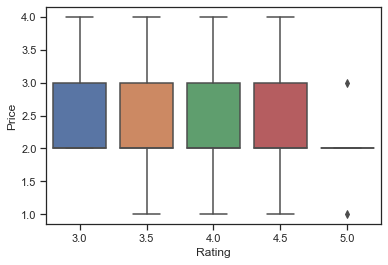

In [145]:
sns.boxplot(x="Rating", y="Price", data=df_prod_nyc.dropna())
# boxplot = sns.boxplot(data=df_prod_nyc["Price"])


# Sactter plot gitter(?) moves dots to be able to view (mpl)
# make bubbles bigger for more total reviews

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

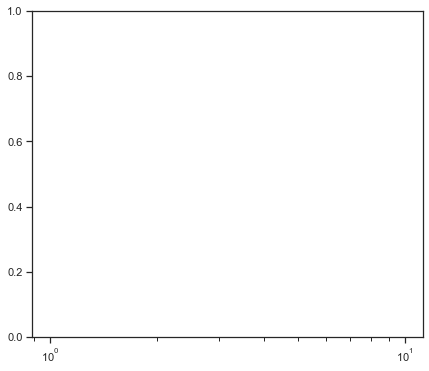

In [132]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset(df_prod_nyc)

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="distance", y="method", data=planets,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [118]:
df_prod_nyc['Rating'].mean()

4.186

In [120]:
df_prod_nyc['Rating'].median()

4.0

In [119]:
df_prod_nyc['Price'].mean()

2.4009819967266774

In [121]:
df_prod_nyc['Price'].median()

2.0

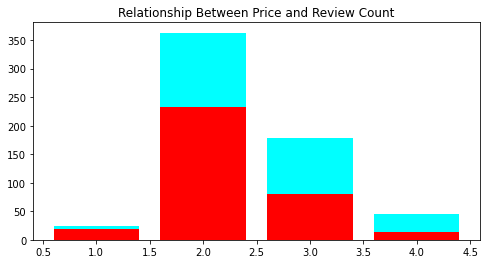

In [31]:
scatter_plot_title = 'Relationship Between Price and Review Count'
x_label = 'Review Count'
y_label = 'Price'
# your code here
tackle_figure, ax = plt.subplots(figsize=(8, 4))



# y1 = df_prod_nyc['Price'].value_counts().sort_index()
# y2 = df_prod_la['Price'].value_counts()
# x1 = df_prod_nyc['Price'].value_counts().sort_index()
# x2 = df_prod_la['Review Count']
ax.set_title(scatter_plot_title) #difficulty setting title is because ncols sets an array of 2, but we only have 1 title

ax.bar(x1, y1, color='cyan')
ax.bar(x2, y2, color='red');

ValueError: shape mismatch: objects cannot be broadcast to a single shape

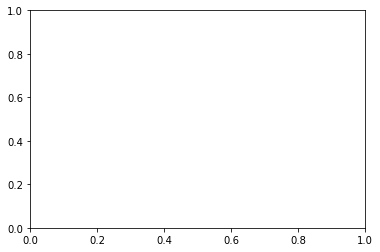

In [120]:
N = 2
menMeans = (20, 35, 30, 35, 27)
menStd =   (2, 3, 4, 1, 2)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, x1, width, color='royalblue') # yerr=menStd)
womenMeans = (25, 32, 34, 20, 25)
womenStd =   (3, 5, 2, 3, 3)
rects2 = ax.bar(ind+width, x2, width, color='seagreen') # yerr=womenStd
# add some
# ax.set_xticks(ind + width / 2)
# ax.set_xticklabels( ('G1', 'G2', 'G3', 'G4', 'G5') )
ax.legend( (rects1[0], rects2[0]), ('NYC', 'NYC') )
plt.show()

/Users/jakeash/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Price'>

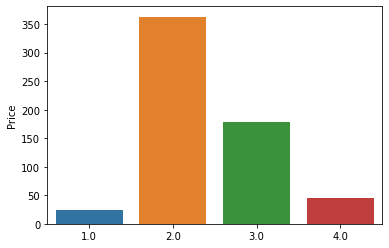

In [123]:
sns.barplot(x1,y1)